In [26]:
import rasterio
from rasterio import Affine as A
from rasterio.warp import reproject, RESAMPLING
import numpy
import matplotlib
%matplotlib inline
from matplotlib import pyplot as plt
plt.ion()

1 loops, best of 3: 222 ms per loop


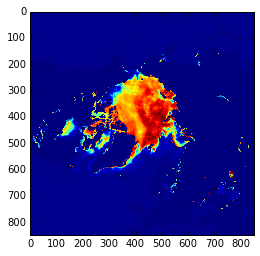

In [34]:
src = rasterio.open('./sic.tiff')
plt.imshow(src.read(1))
src_transform = src.affine
dst_transform = [
        -3850000.0,
         10000,
         0.0,
         5850000.0,
         0.0,
        -10000]

dst_crs = {'init': 'EPSG:3413'}
    
data = src.read()
kwargs = src.meta
kwargs['transform'] = dst_transform
kwargs['height'] = 1120
kwargs['width'] = 760

dst = rasterio.open('./sic-1.tiff', 'w', **kwargs)
%timeit reproject(source=rasterio.band(src, 1), destination=rasterio.band(dst, 1), src_transform=src.affine, src_crs=src.crs, dst_transform = dst_transform, dst_crs = dst_crs, resampling=RESAMPLING.nearest)


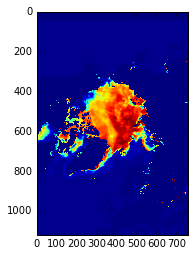

In [35]:
plt.imshow(dst.read(1))